# Lending Club Case Study

In [156]:
#Loading the libraries

import pandas as pd
import numpy as np


In [157]:
#Importing the data


loan_csv_url = 'https://drive.google.com/file/d/1OM0BbebsnDoRsqYAIEDhJPMEE6VwrPIl/view?usp=sharing' #source csv url
loan_dw_url = 'https://drive.google.com/uc?id=' + loan_csv_url.split('/')[-2] #create a download url using the file id from above

loan_dataset = pd.read_csv(loan_dw_url)

C:\Users\Aditya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [158]:
#Data Understanding

loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Dataset Description

The given dataset is a profile of all the customers who have requested for loans from lending club in the period 2007 - 2011. 

This includes the loan amount details, and some customer behavior details whcih were collected with the purpose of getting a holistic view of their risk profiles


## Problem Statement

The objective of the analysis done below is to use this profiling information to predict whether or not a customer will default on his/her loan payments.

High delinquency rate on loans leading to losses for the company is a reason why we require such an analysis to be conducted.

The target variable for our case study will be the **loan_status** variable


## Solution Approach

Since the dataset and the outcome are very specific and restricted to EDA, we have decided to go with only univariate and bivariate analysis, for the **loan_status** variable. 

The key inference that we want to deduce out of this analysis are the indicators, which lead to the loan being defaulted, so that given values for those key indicators, it can be predicted whether the loan is going to be defaulted or not.



## Data Cleaning

In [159]:
#Dropping all columns with NA values

loan_dataset.dropna(axis=1, how='all', inplace = True)

loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

We will also eliminate those columns whose value does not change at all, since plotting them against the target variable will not result in a meaningful analysis

In [160]:
#Removing all the columns which have singular values

loan_dataset = loan_dataset[[col for col in loan_dataset.columns if loan_dataset[col].nunique() > 1]]

loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

## Feature Selection

Based on the understanding from the data dictionary, elimintating those columns which are of no use to the problem statement, or in other words, do not affect the target variable - **loan_status**


* id - The primary key of the dataset, used to uniquely identify each loan assigned by lending club, its randomly generated, so wont contain any patterns
* member_id - Again, randomly generated id for the member, assigned by Lending Club
* desc - Loan description provied by the borrower - this is a sentence in natural language given by the borrower, in no standardized format, hence there is no way to convert this into a categorical or continuous variable without applying NLP. Hence, disregarding this as well
* title - Loan title provided by the borrower, same as desc
* url - This is the url for the lending club web page where the loan data for that particluar listing can be found - Not a defining factor for analysis
* zip code - The zip code of the boorower - it is masked and also doesnt provide necessary information towards predicting whether the borrower will default or not

* #### Member behaviour features -  

These features are representative of the member's patterns and habits while repaying the loans, data which would not be avaiable to us while the applicant is filing an application for a loan

   * delinq_2yrs
   * mths_since_last_delinq
   * mths_since_last_record

* #### Ongoing Loan features -

These features describe the details for the ongoing loan instalments and payments, which also would not be relevant/available at the time of application

 *  out_prncp                
 *  out_prncp_inv            
 *  total_pymnt              
 *  total_pymnt_inv          
 *  total_rec_prncp          
 *  total_rec_int            
 *  total_rec_late_fee       
 *  recoveries               
 *  collection_recovery_fee  
 *  last_pymnt_d             
 *  last_pymnt_amnt          
 *  next_pymnt_d
 *  last_credit_pull_d


In [261]:
# Only keeping relevant columns in the dataset

loan_dataset_final = loan_dataset.drop(['id', 'member_id', 'desc', 'title', 'url', 'zip_code', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'], axis=1, inplace = False)

loan_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

After performing feature selection, we are left with 27 relevant columns in the dataset. We will now perform missing value and outlier treatment for these columns before proceeding with transformation

## Missing Value Treatment

We will first define some reusable functions for dealing with missing values

In [262]:
#Defining a function to calculate percentage of missing values for a column

def percentage_missing(column_name):
    
    # Percentage of the ratio of - sum of na values of the column to the count of the column
    column_percent_missing = (loan_dataset_final[column_name].isna().sum()/loan_dataset_final[column_name].count())*100
    
    return column_percent_missing


#Defining a function to replace n/a values with an imputation

def replace_na(column_name, replacement):
    
    #Find the coordinates of the n/a valued rows of the given column, and replace them with the value given
    loan_dataset_final.loc[loan_dataset_final[column_name].isna()==True, column_name] = replacement

From inspection of the dataset, the first column that actually has n/a or missing values is the emp_title column. It has both blanks as well as N/A

In [263]:
#Getting the count of missing values from the column

emp_title_percent_missing = percentage_missing('emp_title')

print(emp_title_percent_missing)

6.599924848354716


Here, as the percentage of missing values is small, it makes sense to impute them, however as the column describes employment of the member, it doesnt make sense to replace it with the mode of the column as we would with a categorical variable. Hence we can replace it with 'Unknown', which would become another bin for the values

In [264]:
#Replace all n/a and blank values with unknown

replace_na('emp_title','Unknown')

loan_dataset_final['emp_title']

0                           Unknown
1                             Ryder
2                           Unknown
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                       Unknown
39715                       Unknown
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [265]:
#Similar treatment can be given to the emp_length column as well

emp_len_percent_missing = percentage_missing('emp_length')

print(emp_len_percent_missing)

replace_na('emp_length','Unknown')

loan_dataset_final['emp_length'].isna().sum()


2.7819471041871537


0

The next column with missing values is the **revol_util** column, which, according to [this](https://www.lendingclub.com/loans/resource-center/what-is-credit-utilization) link, is the ratio of your currently used credit balance to the total credit limit.

Thus, it is a dependent variable on the **revol_bal** variable. We can analyse the values of missing values against the total_bal column

In [266]:
loan_dataset_final[loan_dataset_final['revol_util'].isna()==True][['revol_bal','revol_util']]

,revol_bal,revol_util
3565,0,NaN
4714,0,NaN
4943,0,NaN
11282,0,NaN
12042,0,NaN
12147,0,NaN
13891,0,NaN
17985,0,NaN
18184,0,NaN
21604,0,NaN


As we can see, for all the rows except one, we can say that the revolving balance is 0 where revolving utilization is n/a. Also, we can see that wherever the revol_util is 0, the revol_bal is invariably 0.

Therefore, we can safely impute the missing revol_util values with 0.


In [267]:
replace_na('revol_util', 0)

loan_dataset_final['revol_util'].isna().sum()

0

The final column with missing values is the pub_rec_bankruptcies column, which is a record of publicly declared bankruptcies by the member. The percentage of NA values in this columns is relatively small.

In [268]:
pub_rec_bank_missing = percentage_missing('pub_rec_bankruptcies')

print(pub_rec_bank_missing)

1.7862634546386469


As this column is a numerical categorical variable, with values in 0, 1 and 2, we will replace the missing values with th mode of the column

In [269]:
loan_dataset_final['pub_rec_bankruptcies'].mode()

0    0.0
dtype: float64

As the mode is 0, we can replace all the N/A values with 0

In [270]:
replace_na('pub_rec_bankruptcies', 0)

In [271]:
percentage_missing('pub_rec_bankruptcies')

0.0

## Data Transformation

If we look at the info of the dataset, we can see that many of the columns are object typed, which may be incorrect for the feature they represent

In [272]:
loan_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             39717 non-null  object 
 9   emp_length            39717 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

This is due to the data in these columns being in a inconsistent format, or having some extra identifiers or keywords in front of them which may be removed. We look at these features below and perform transforamtions wherever necessary

The term column represents the duration of the loan - it has only 2 possible options - 36 months or 60 months.

We can convert this into a categorical variable by having 2 bins - 3 to represent 3 years(36 months) and 5 to represent 60 months or 5 years.

In [273]:
#Defining a generailzed replace function to be used for transformation

def replace(column_name, condition, replacement):
    
    loan_dataset_final.loc[loan_dataset_final[column_name] == condition, column_name] = replacement
    

In [274]:
#Convert term column to string

loan_dataset_final = loan_dataset_final.astype({'term':'string'})

#Use replace function

replace('term', ' 36 months', '3')
replace('term', ' 60 months', '3')

#Convert back to int

loan_dataset_final = loan_dataset_final.astype({'term':np.int64})


In [275]:
#The column int_rate has percentage in front of it, removing those

loan_dataset_final['int_rate'] = loan_dataset_final['int_rate'].str.replace('%','').astype(np.float64)


In [276]:
#For the column emp_length, we remove descriptive text and turn it into a categorical variable with 10 bins

loan_dataset_final['emp_length'] = loan_dataset_final['emp_length'].str.replace(' years','')
loan_dataset_final['emp_length'] = loan_dataset_final['emp_length'].str.replace(' year','')

loan_dataset_final['emp_length'] = loan_dataset_final['emp_length'].str.replace('+','')
loan_dataset_final['emp_length'] = loan_dataset_final['emp_length'].str.replace('< 1','1')



C:\Users\Aditya\AppData\Local\Temp/ipykernel_6116/1105096965.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_dataset_final['emp_length'] = loan_dataset_final['emp_length'].str.replace('+','')


For the target variable, **loan_status**, we can ignore the current loan row items as they will not provide us with insight for the required analysis

In [277]:
#Drop the row items that contain loan_status as current

loan_dataset_final.drop(loan_dataset_final[loan_dataset_final['loan_status']=='Current'].index, inplace=True)

In [278]:
#Convert term column to string

loan_dataset_final = loan_dataset_final.astype({'loan_status':'string'})

#Replace Charged Off with 1 and Fully Paid with 0 fro convenience

replace('loan_status', 'Charged Off', '1')
replace('loan_status', 'Fully Paid', '0')

#Convert back to int

loan_dataset_final = loan_dataset_final.astype({'loan_status':np.int64})

In [279]:
loan_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int64  
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             38577 non-null  object 
 9   emp_length            38577 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  int64  
 15  purpose            

In [280]:
#Convert revol_util column to string

loan_dataset_final = loan_dataset_final.astype({'revol_util':'string'})

#Remove percentage symbol from all rows

loan_dataset_final['revol_util'] = loan_dataset_final['revol_util'].str.replace('%','',regex=True)

#Convert back to float

loan_dataset_final = loan_dataset_final.astype({'revol_util':np.float64})

## Outlier detection using boxplots

We will identify and remove extreme values or __outliers__ from our dataset for all the continuous variables. These values can tilt our analysis and often provide us with a biased perspective of the data available.

We can detect the outliers using box plots:

In [188]:
#Importing matplotlib for plotting

import matplotlib.pyplot as plt
%matplotlib inline

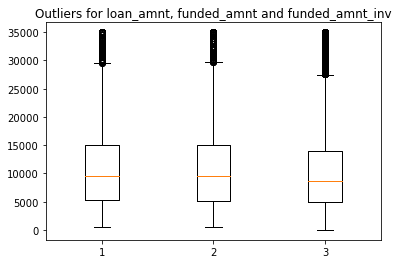

In [189]:
fig1, ax1 = plt.subplots()
ax1.set_title('Outliers for loan_amnt, funded_amnt and funded_amnt_inv')

ax1.boxplot([loan_dataset_final['loan_amnt'], loan_dataset_final['funded_amnt'], loan_dataset_final['funded_amnt_inv']])
ax1.
plt.show()

In [195]:
#Checking the values of the loan listings whose requested amount is greater than 30000 dollars

loan_dataset_final[loan_dataset_final['loan_amnt']>30000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
31,31825,31825,31825.00000,3,7.90,995.82,A,A4,Audubon Mutual Housing Corporation,5,...,NJ,14.03,Nov-81,0,12,0,23151,27.40%,26,0.0
80,35000,22075,22050.00000,3,17.27,551.84,D,D3,tutor Per ini Corporation,3,...,NY,7.51,Jun-03,1,11,0,7334,53.30%,31,0.0
128,35000,35000,35000.00000,3,8.90,1111.37,A,A5,City of Los Angeles,6,...,CA,22.71,Aug-00,0,8,0,9051,34.80%,32,0.0
185,35000,35000,35000.00000,3,10.65,1140.07,B,B2,baylor college of medicine,2,...,TX,3.17,Dec-02,1,16,0,1099,1.40%,22,0.0
268,35000,26825,26800.00000,3,18.64,690.56,E,E1,"Navistar, Inc.",8,...,IL,12.00,Jan-95,1,16,0,31071,53%,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,35000,35000,31845.22117,3,18.99,907.73,F,F3,New York City Police Department,10,...,NY,12.27,Apr-91,0,7,0,29759,97.30%,14,0.0
19760,33000,33000,29044.28153,3,16.77,816.06,E,E2,Unknown,Unknown,...,WA,20.04,Mar-89,1,6,0,54285,68.50%,24,0.0
19800,32000,32000,31684.89912,3,20.85,863.01,G,G3,"Best Bath Store, LLC",5,...,MA,13.04,Apr-03,0,4,0,27618,97.20%,11,0.0
19811,32000,32000,31569.14450,3,19.74,843.19,F,F5,DLA Piper LLP US,8,...,NY,16.36,May-04,0,10,1,33036,73.90%,12,1.0


Looking at the data, we realize that these outliers are not due to human/system errors, they are genuine loan listings for some high profile customers with variation of loan_status across the rows. Hence it doesnt make sense to remove them, as they might add value to our analysis

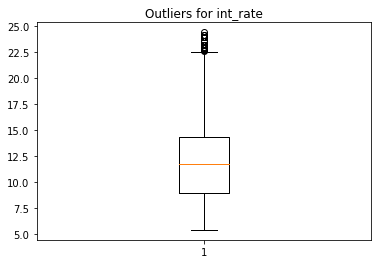

In [200]:
fig1, ax1 = plt.subplots()
ax1.set_title('Outliers for int_rate')

ax1.boxplot(loan_dataset_final['int_rate'])

plt.show()

Again, as we can see from the dataset, all of these above 22.5% interest rate are again high profile listings with a higher requested and funded amount, so keeping them for analysis

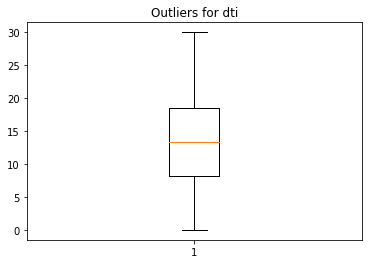

In [201]:
fig1, ax1 = plt.subplots()
ax1.set_title('Outliers for dti')
fig1, ax1 = plt.subplots()
ax1.set_title('Outliers for int_rate')

ax1.boxplot(loan_dataset_final['int_rate'])

plt.show()
ax1.boxplot(loan_dataset_final['dti'])

plt.show()

No outliers for dti

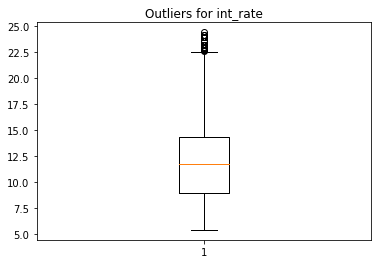

In [200]:
fig1, ax1 = plt.subplots()
ax1.set_title('Outliers for int_rate')

ax1.boxplot(loan_dataset_final['int_rate'])

plt.show()

# Data Visualization

We will first perform univariate analysis of the target loan_status variable with its counts, to see if we can gain any inferences out of it

Seaborn plots are used for clear representation

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


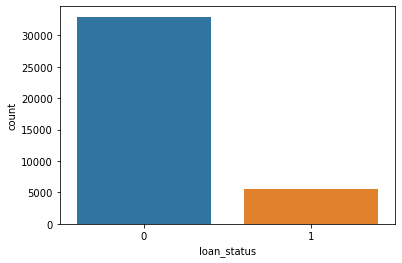

In [294]:
#First a count plot for the loan_status variable for understanding distribution

import seaborn as sns

sns.countplot(loan_dataset_final.loan_status)
plt.show()

As stated in the data transformation section above, we have transformed the loan status variable into 0 for Fully Paid and 1 for Charged Off.

Therefore, from the above plot it is clear that more than 30000 entries correspond to fully paid off loans and about 5000 entries are Charged Off.

Next, we will analyze the distribution of the loan amount requested by the borrower to lending club, the amount approved by lending club, and the amount actually funded by the investors

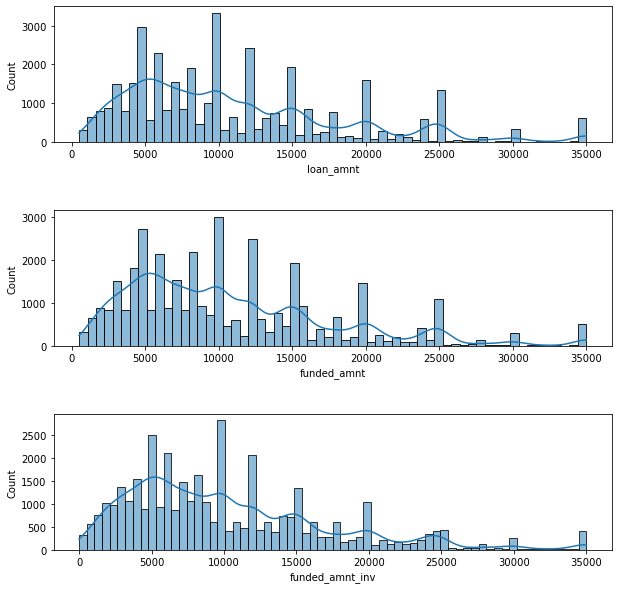

In [317]:
#Histogram plots for loan_amnt, funded_amnt and funded_amnt_inv variable

fig = plt.figure()
fig.subplots_adjust(hspace=0.5) # Spacing between plots
fig.set_size_inches(10, 10)

#Loan amount histogram
ax = fig.add_subplot(3,1,1)
sns.histplot(loan_dataset_final.loan_amnt, kde = True, ax=ax)

#Funded amount histogram
ax = fig.add_subplot(3,1,2)
sns.histplot(loan_dataset_final.funded_amnt, kde = True, ax=ax)

#Funded amount by investor histogram
ax = fig.add_subplot(3,1,3)
sns.histplot(loan_dataset_final.funded_amnt_inv, kde = True, ax=ax)

plt.show()

Most of the loan listings that are requested and funded lie in the range of 5000 to 15000 dollars.

We can bin the variables and perform segmented univariate analysis

In [ ]:
#Using pandas cut, we can bin the loan_amnt variable into 5000 dollar segments

pd.cut(loan_dataset_final['loan_amnt'], )